# Análisis de Distribuciones: Histogramas y Boxplots

En este notebook analizaremos dos tipos de distribuciones de probabilidad:
1. Distribución Exponencial
2. Distribución Normal

Utilizaremos NumPy para generar datos aleatorios y Matplotlib para visualizarlos.

## Distribuciones de Probabilidad

### Distribución Exponencial
- Se utiliza para modelar tiempos entre eventos
- Tiene un parámetro λ (lambda) que determina su forma
- Es asimétrica positiva (sesgo a la derecha)
- Su media y desviación estándar son iguales a 1/λ

### Distribución Normal (Gaussiana)
- Es la distribución más común en estadística
- Tiene forma de campana (curva de Gauss)
- Es simétrica alrededor de su media
- Se caracteriza por dos parámetros: media (μ) y desviación estándar (σ)

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats


In [20]:
X1= np.linspace(0.1,5,100)

In [21]:
fx1=[math.exp(-1*X1[i]) for i in range(len(X1))]

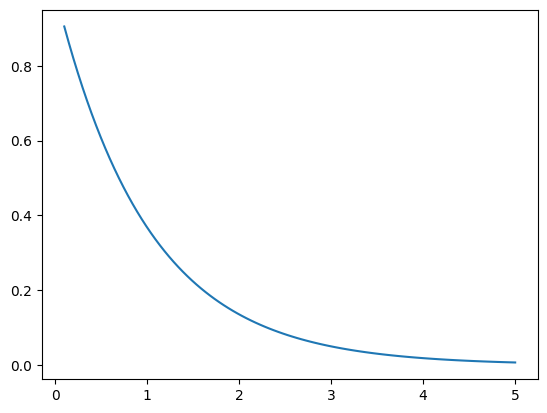

In [22]:
plt.plot(X1,fx1)

In [23]:
plt.show()

In [24]:
# Generamos 500 números aleatorios siguiendo una distribución exponencial
# con parámetro lambda = 2
x2 = np.random.exponential(2, 500)

# Calculamos la media de los datos generados
np.mean(x2)  # Debería estar cerca de 2

# Creamos un histograma con 9 bins para visualizar la distribución
freq_x2, bins_x2 = np.histogram(x2, bins=9)

(array([262., 136.,  60.,  22.,  15.,   3.,   0.,   1.,   1.]),
 array([4.23453388e-03, 1.53620876e+00, 3.06818300e+00, 4.60015723e+00,
        6.13213146e+00, 7.66410569e+00, 9.19607992e+00, 1.07280542e+01,
        1.22600284e+01, 1.37920026e+01]),
 <BarContainer object of 9 artists>)

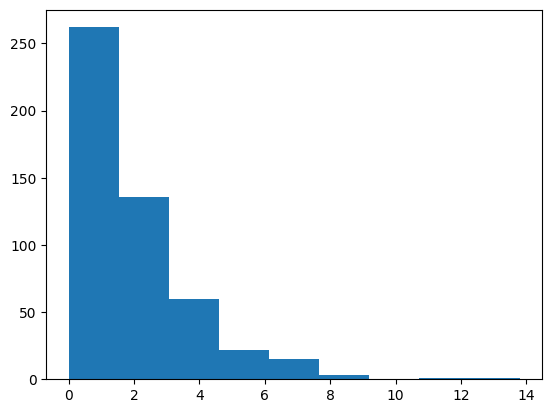

In [25]:
plt.hist(x2, bins_x2)

In [26]:
plt.show()

## Distribución Normal

Generamos datos siguiendo una distribución normal (gaussiana) con:
- Media (μ) = 2
- Desviación estándar (σ) = 0.5
- Número de observaciones = 500

In [27]:
# Generamos 500 números aleatorios siguiendo una distribución normal
x3 = np.random.normal(2, 0.5, 500)

# Calculamos la media de los datos generados
np.mean(x3)  # Debería estar cerca de 2

# Calculamos la desviación estándar
np.std(x3)  # Debería estar cerca de 0.5

# Creamos un histograma con 12 bins para visualizar la distribución
freq_x3, bins_x3 = np.histogram(x3, bins=12)

El 2 es la media, el 0.5 es la desviacion estandar y el 500 es el numero de observaciones

(array([ 2.,  4., 12., 27., 54., 72., 96., 90., 68., 41., 18., 16.]),
 array([0.32590849, 0.56932303, 0.81273757, 1.05615211, 1.29956665,
        1.5429812 , 1.78639574, 2.02981028, 2.27322482, 2.51663936,
        2.7600539 , 3.00346845, 3.24688299]),
 <BarContainer object of 12 artists>)

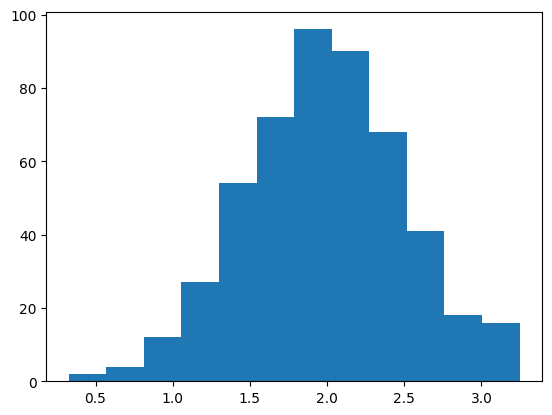

In [28]:
plt.hist(x3, bins=bins_x3)

In [29]:
plt.show()

In [30]:
(np.mean(x2)-np.median(x2))/np.std(x2)

np.float64(0.28040112672017775)

In [31]:
(np.mean(x3)-np.median(x3))/np.std(x3)

np.float64(0.026245516434705976)

## Análisis de Asimetría

Calculamos el coeficiente de asimetría para ambas distribuciones:
- Para la distribución exponencial, esperamos una asimetría positiva (sesgo a la derecha)
- Para la distribución normal, esperamos una asimetría cercana a cero (distribución simétrica)

In [32]:
# Creamos un DataFrame con ambas distribuciones para facilitar el análisis
dict1 = {'expo': list(x2), 'normal': list(x3)}
dataFrame1 = pd.DataFrame(dict1)

# Mostramos las primeras filas del DataFrame
dataFrame1.head()

# Obtenemos estadísticas descriptivas de ambas distribuciones
dataFrame1.describe()

# Calculamos el coeficiente de asimetría para la distribución exponencial
dataFrame1["expo"].skew()  # Debería ser positivo

np.float64(1.8335039705874232)

## Interpretación de los Histogramas

### Distribución Exponencial
- Observamos que la mayoría de los valores se concentran cerca del cero
- La frecuencia disminuye exponencialmente a medida que aumentan los valores
- Esto es típico de una distribución exponencial

### Distribución Normal
- Vemos una forma aproximadamente simétrica
- Los valores se concentran alrededor de la media (2)
- La dispersión está controlada por la desviación estándar (0.5)

## Visualización con Boxplots

Los boxplots nos permiten visualizar:
- La mediana (línea central)
- Los cuartiles (extremos de la caja)
- Los valores atípicos (puntos individuales)
- La dispersión de los datos

Observamos que:
- La distribución exponencial muestra una clara asimetría positiva
- La distribución normal es más simétrica

In [33]:
%matplotlib inline

<Axes: >

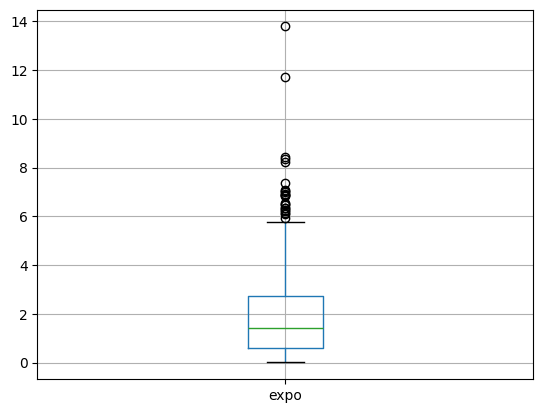

In [34]:
dataFrame1.boxplot(column='expo')

<Axes: >

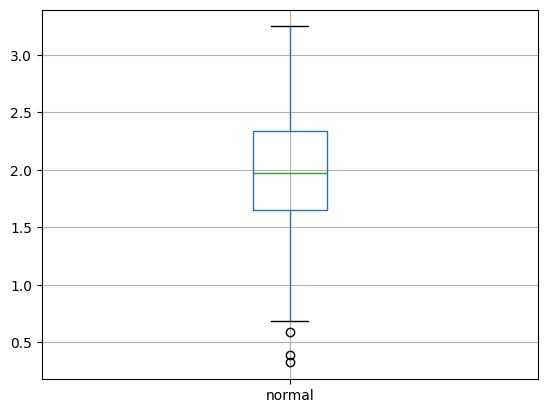

In [35]:
dataFrame1.boxplot(column='normal')

In [41]:
# Calculamos estadísticas adicionales
print("Estadísticas para la distribución exponencial:")
print(f"Mediana: {np.median(x2):.3f}")
print(f"Moda: {stats.mode(x2, keepdims=True)[0][0]:.3f}")  # Corregimos el cálculo de la moda
print(f"Rango: {np.max(x2) - np.min(x2):.3f}")
print(f"Coeficiente de variación: {np.std(x2)/np.mean(x2):.3f}")

print("\nEstadísticas para la distribución normal:")
print(f"Mediana: {np.median(x3):.3f}")
print(f"Moda: {stats.mode(x3, keepdims=True)[0][0]:.3f}")  # Corregimos el cálculo de la moda
print(f"Rango: {np.max(x3) - np.min(x3):.3f}")
print(f"Coeficiente de variación: {np.std(x3)/np.mean(x3):.3f}")

Estadísticas para la distribución exponencial:
Mediana: 1.430
Moda: 0.004
Rango: 13.788
Coeficiente de variación: 0.941

Estadísticas para la distribución normal:
Mediana: 1.973
Moda: 0.326
Rango: 2.921
Coeficiente de variación: 0.257


## Conclusiones

### Distribución Exponencial
- Muestra una clara asimetría positiva
- Tiene una cola larga hacia la derecha
- Es útil para modelar tiempos de espera o duración de eventos

### Distribución Normal
- Es aproximadamente simétrica
- Los datos se concentran alrededor de la media
- Es fundamental en estadística por el Teorema del Límite Central

C:\Users\xiaom\AppData\Local\Temp\ipykernel_15040\3907990112.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x2, shade=True)
C:\Users\xiaom\AppData\Local\Temp\ipykernel_15040\3907990112.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x3, shade=True)


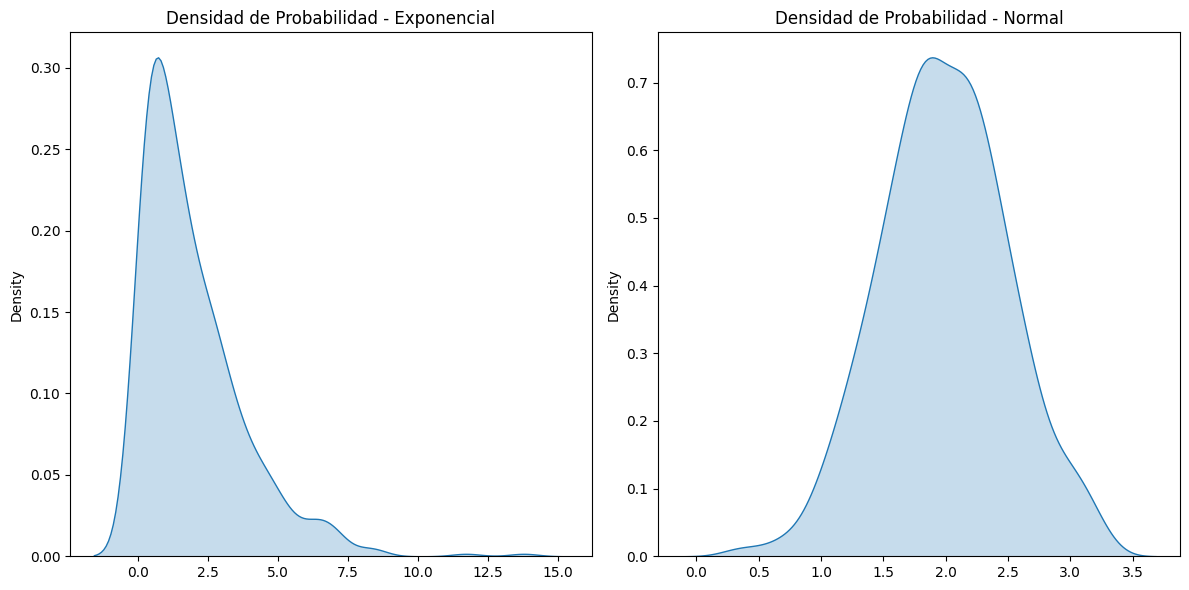

In [42]:
# Creamos un gráfico de densidad de probabilidad
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(x2, shade=True)
plt.title('Densidad de Probabilidad - Exponencial')
plt.subplot(1, 2, 2)
sns.kdeplot(x3, shade=True)
plt.title('Densidad de Probabilidad - Normal')
plt.tight_layout()
plt.show()